<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >

# Aggregations: Min, Max, and Everything In Between

In [2]:
import numpy as np

In [3]:
L = np.random.random(100)
sum(L)

51.49633631112242

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [4]:
np.sum(L)

51.496336311122434

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [20]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

233 ms ± 24.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.89 ms ± 328 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [6]:
min(big_array), max(big_array)

(2.5954448958920295e-06, 0.99999942646760454)

In [7]:
np.min(big_array), np.max(big_array)

(2.5954448958920295e-06, 0.99999942646760454)

In [8]:
%timeit min(big_array)
%timeit np.min(big_array)

85 ms ± 9.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
734 µs ± 101 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [9]:
print(big_array.min(), big_array.max(), big_array.sum())

2.59544489589e-06 0.999999426468 500297.291291


### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [12]:
M = np.random.random((3, 4))
print(M)

[[ 0.52640731  0.22402314  0.86685072  0.24432764]
 [ 0.87917353  0.79991177  0.16509474  0.93213278]
 [ 0.36818535  0.02640997  0.22182609  0.35728019]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [22]:
sum(M)


array([ 1.77376619,  1.05034488,  1.25377155,  1.5337406 ])

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [15]:
M.sum(axis=0)

array([ 1.73170265,  0.95924382,  1.32200141,  1.34758343])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [12]:
M.max(axis=1)

array([ 0.8967576 ,  0.99196818,  0.6687194 ])

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

We'll use the Pandas package, which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

In [16]:
import pandas as pd
import numpy as np
data = pd.read_csv('data\president_heights.csv')
print(data.head(8))
heights = np.array(data['height(cm)'])
print(heights)

   order               name  height(cm)
0      1  George Washington         189
1      2         John Adams         170
2      3   Thomas Jefferson         189
3      4      James Madison         163
4      5       James Monroe         183
5      6  John Quincy Adams         171
6      7     Andrew Jackson         185
7      8   Martin Van Buren         168
[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics:

In [17]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.738095238
Standard deviation: 6.93184344275
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [18]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). For example, this code generates the following chart:

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

Text(0.5,0,'height (cm)')

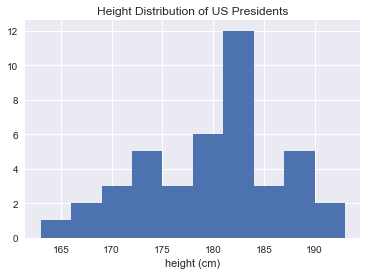

In [24]:
plt.hist(heights);
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
#plt.ylabel('number');

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.

<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >